In [3]:
%matplotlib inline
import matplotlib.pyplot as plt
import torch
from d2l import torch as d2l

## 1. Giới thiệu 
Multilayer Perceptron (MLP) là một mô hình mạng nơ-ron nhân tạo có cấu trúc gồm ít nhất ba lớp: một lớp đầu vào, một hoặc nhiều lớp ẩn, và một lớp đầu ra. Mỗi lớp bao gồm một tập hợp các nơ-ron (đơn vị tính toán), trong đó mỗi nơ-ron ở một lớp được kết nối đầy đủ với tất cả các nơ-ron ở lớp kế tiếp. MLP sử dụng hàm kích hoạt phi tuyến (như ReLU, sigmoid hoặc tanh) để tăng khả năng mô hình hóa các mối quan hệ phi tuyến giữa đầu vào và đầu ra. Mô hình này thường được huấn luyện bằng thuật toán lan truyền ngược (backpropagation) kết hợp với gradient descent để điều chỉnh trọng số các kết nối.

## 2. Ứng dụng của Multilayer Perceptron

Multilayer Perceptron (MLP) là một trong những kiến trúc cơ bản và phổ biến nhất của mạng nơ-ron nhân tạo. Nhờ cấu trúc nhiều lớp và khả năng học phi tuyến thông qua các hàm kích hoạt, MLP có thể mô hình hóa được các mối quan hệ phức tạp giữa đầu vào và đầu ra. MLP đã được ứng dụng rộng rãi trong nhiều lĩnh vực, bao gồm:
#### Phân loại (Classification)
MLP thường được sử dụng trong các bài toán phân loại dữ liệu như:<br>
* Nhận diện chữ viết tay (ví dụ: phân loại chữ số MNIST)<br>
* Phân loại email spam<br>
* Phân loại ảnh đơn giản hoặc tín hiệu sinh học (ECG, EEG)<br>

Với khả năng học từ dữ liệu đầu vào phi tuyến, MLP có thể phân chia không gian đặc trưng thành các vùng phức tạp hơn so với các mô hình tuyến tính.

#### Dự đoán hồi quy (Regression)
MLP còn được sử dụng cho các bài toán dự đoán giá trị liên tục như:<br>
* Dự báo giá cổ phiếu, giá nhà<br>
* Dự đoán mức tiêu thụ năng lượng<br>
* Dự báo thời tiết<br>

Nhờ cấu trúc sâu, MLP có thể học các hàm ánh xạ phức tạp từ đầu vào đến giá trị dự đoán.

#### Xử lý ngôn ngữ tự nhiên (NLP)
Trong các mô hình NLP đơn giản, MLP có thể được dùng sau các lớp biểu diễn (embedding) để thực hiện các tác vụ:

* Phân loại cảm xúc (sentiment analysis)
* Phân loại văn bản
* Dự đoán từ tiếp theo (next word prediction)

#### Thị giác máy tính (Computer Vision)
Mặc dù ngày nay CNN (Convolutional Neural Network) được ưu tiên hơn trong thị giác máy tính, nhưng MLP vẫn được dùng cho các tác vụ đơn giản hoặc làm lớp cuối cùng (classifier) trong mô hình thị giác:

* Phân loại ảnh kích thước nhỏ
* Nhận diện đối tượng sau khi trích xuất đặc trưng

## 3. Giải quyết vấn đề trong Computer Science
Multilayer Perceptron (MLP) là một mô hình mạng nơ-ron truyền thống có cấu trúc nhiều lớp fully-connected, được sử dụng rộng rãi trong nhiều bài toán trong ngành Khoa học Máy tính. Nhờ khả năng học các hàm phi tuyến phức tạp, MLP đã chứng minh được hiệu quả trong nhiều lĩnh vực cốt lõi như:

#### Trí tuệ nhân tạo (Artificial Intelligence)
* Phân loại ảnh, âm thanh, văn bản: MLP có thể được huấn luyện để thực hiện các tác vụ nhận dạng mẫu trong dữ liệu đầu vào.
* Chơi game: Trong các mô hình học tăng cường (reinforcement learning), MLP thường đóng vai trò là hàm chính sách hoặc hàm giá trị.
#### Học máy (Machine Learning)
* Hồi quy phi tuyến: MLP được dùng để ánh xạ đầu vào sang đầu ra phi tuyến trong các bài toán dự đoán.
* Giảm chiều dữ liệu: Dùng trong autoencoder để biểu diễn dữ liệu ở không gian đặc trưng thấp hơn.
#### Xử lý ngôn ngữ tự nhiên (NLP)
* Phân loại văn bản: Như phát hiện spam, phân tích cảm xúc, hoặc nhận dạng thực thể.
* Gán nhãn chuỗi: Dùng MLP trong các mô hình như BiLSTM+MLP để gán nhãn từ theo ngữ cảnh.
#### Thị giác máy tính (Computer Vision)
* Lớp phân loại sau CNN: Trong các mô hình thị giác sâu, MLP thường được dùng ở phần cuối mạng để ánh xạ đặc trưng thành nhãn đầu ra.
* Nhận dạng mẫu đơn giản: Cho các bài toán ảnh nhỏ hoặc dữ liệu có số chiều thấp.
#### An ninh mạng và bảo mật
* Phát hiện xâm nhập (Intrusion Detection): MLP có thể học để phân biệt hành vi mạng bình thường và bất thường.
* Phân tích mã độc (Malware Detection): Học từ đặc trưng của tập tin để xác định phần mềm độc hại.
#### Khoa học dữ liệu và khai phá dữ liệu
* Phân cụm có giám sát (Supervised Clustering)
* Dự báo chuỗi thời gian


## 4. Hidden Layers

### 4.1 Giới hạn của mô hình tuyến tính (linear model)
Mô hình tuyến tính, mặc dù đơn giản và dễ diễn giải, lại gặp nhiều hạn chế khi áp dụng vào các bài toán phức tạp. Một trong những giả định yếu hơn mà mô hình tuyến tính chấp nhận là **tính đơn điệu (_monotonicity_)** – tức là, khi một đặc trưng tăng thì đầu ra của mô hình cũng phải tăng (nếu trọng số dương), hoặc giảm (nếu trọng số âm).  

- Trong một số trường hợp, giả định này có vẻ hợp lý, ví dụ như khi dự đoán khả năng trả nợ của một cá nhân dựa vào thu nhập. Tuy nhiên, mối quan hệ này thường **không tuyến tính** — ví dụ, sự gia tăng thu nhập từ 0 lên 50.000 USD có thể ảnh hưởng nhiều hơn đến khả năng trả nợ so với việc tăng từ 1 triệu lên 1.05 triệu USD.

- Trong các trường hợp khác, giả định đơn điệu thậm chí **không còn đúng nữa**. Ví dụ: dự đoán rủi ro sức khỏe từ thân nhiệt – cả khi nhiệt độ cao hơn hoặc thấp hơn 37°C đều có thể tăng rủi ro. Trong trường hợp đó, cần **tiền xử lý dữ liệu**, như lấy giá trị chênh lệch so với 37°C.

- Với các bài toán như **phân loại hình ảnh mèo và chó**, mô hình tuyến tính tỏ ra không hiệu quả. Việc giả định rằng độ sáng của một điểm ảnh có thể quyết định loài vật là không hợp lý. Mô hình tuyến tính thất bại khi **đảo màu ảnh** nhưng nhãn lớp không đổi.

Đây là lúc **mạng nơ-ron sâu phi tuyến** như MLP phát huy tác dụng. Các lớp ẩn và hàm kích hoạt phi tuyến giúp mạng học sâu **tự động học biểu diễn đặc trưng** và mô hình hóa các quan hệ phi tuyến mà không cần thiết kế thủ công.

### 4.2 Tính phi tuyến trong lịch sử

Khả năng mô hình hóa phi tuyến đã được nghiên cứu từ lâu:

- **Cây quyết định**: được đề xuất bởi *Fisher (1925)*, và phát triển bởi *Quinlan (1993)*.
- **Hàm kernel**: được sử dụng từ rất sớm trong các phương pháp spline và nonparametric (Aronszajn, 1950; Wahba, 1990).
- **Mạng nơ-ron sinh học**: theo mô hình não bộ (Schölkopf & Smola, 2002; Ramón y Cajal, 1894).

Nhờ sự kết nối nhiều tầng đơn giản, ta có thể tạo ra hệ thống học có năng lực biểu diễn mạnh, là nền tảng của học sâu hiện đại.


### 4.3 Kết hợp các lớp ẩn (hidden layers)

Trong phần này, chúng ta sẽ thảo luận về sự chuyển đổi từ mô hình tuyến tính sang phi tuyến trong Mạng Perceptron Đa tầng (MLP). Đặc biệt, chúng ta tập trung vào vai trò của hàm kích hoạt phi tuyến trong việc nâng cao khả năng biểu diễn của mô hình.

#### 4.3.1 Thêm lớp ẩn vào mô hình tuyến tính không dùng Activation Function

Đầu vào ma trận: $\mathbf{X} \in \mathbb{R}^{n \times d}$ biểu diễn một minibatch gồm $n$ mẫu, mỗi mẫu có $d$ đặc trưng.<br >
Tầng ẩn:<br>
* Weights:  $\mathbf{W}^{(1)} \in \mathbb{R}^{d \times h}$. <br>
* Biases:   $\mathbf{b}^{(1)} \in \mathbb{R}^{1 \times h}$. <br>
* Đầu ra tâng ẩn:  $\mathbf{H} = \mathbf{X} \mathbf{W}^{(1)} + \mathbf{b}^{(1)}$ <br>

Tầng output:<br>
* Weights:  $\mathbf{W}^{(2)} \in \mathbb{R}^{h \times q}$. <br>
* Biases:   $\mathbf{b}^{(2)} \in \mathbb{R}^{1 \times q}$. <br>
* Đầu ra cuối cùng:  $\mathbf{O} = \mathbf{H} \mathbf{W}^{(2)} + \mathbf{b}^{(2)}$ <br>

Khi không sử dụng hàm kích hoạt phi tuyến, mô hình MLP một tầng ẩn có thể được rút gọn thành một mô hình tuyến tính đơn giản:<br>

$$
\mathbf{O} = (\mathbf{X} \mathbf{W}^{(1)} + \mathbf{b}^{(1)})\mathbf{W}^{(2)} + \mathbf{b}^{(2)} = \mathbf{X} \mathbf{W}^{(1)}\mathbf{W}^{(2)} + \mathbf{b}^{(1)} \mathbf{W}^{(2)} + \mathbf{b}^{(2)} = \mathbf{X} \mathbf{W} + \mathbf{b}.
$$
<br>
Hệ quả: Việc thêm các tầng ẩn không làm tăng khả năng biểu diễn của mô hình vì tổ hợp các phép biến đổi tuyến tính vẫn chỉ là một phép biến đổi tuyến tính.

#### 4.3.2 Vai trò của Nonlinear Activation Function
Hàm kích hoạt phi tuyến (ví dụ: ReLU, sigmoid, tanh) được áp dụng cho từng phần tử của đầu ra tầng ẩn:
$$
\begin{aligned}
    \mathbf{H} & = \sigma(\mathbf{X} \mathbf{W}^{(1)} + \mathbf{b}^{(1)}), \\
    \mathbf{O} & = \mathbf{H}\mathbf{W}^{(2)} + \mathbf{b}^{(2)}.\\
\end{aligned}
$$

Tác dụng của Activation Function:
* Phá vỡ tính tuyến tính: Hàm kích hoạt phi tuyến ngăn việc "gộp" các tầng thành một phép biến đổi tuyến tính đơn giản.
* Tăng khả năng biểu diễn: Mô hình có thể học các hàm phức tạp hơn, bao gồm các hàm phân tầng hoặc đa thức.

### 4.4 Hàm kích hoạt
Hàm kích hoạt trong mạng neural là hàm phi tuyến được áp dụng lên đầu ra của mỗi lớp (thường là sau phép biến đổi tuyến tính), giúp mạng có thể học được các quan hệ phi tuyến phức tạp trong dữ liệu.
#### 4.4.1 Hàm kích hoạt ReLU 
Hàm ReLU (Rectified Linear Unit) là một hàm cung cấp một phép biến đổi phi tuyến rất đơn giản. Với một phần tử đầu vào bất kỳ, hàm được định nghĩa là giá trị lớn hơn giữa phần tử đó và $0$. Hàm ReLU là lựa chọn phổ biến bởi sự đơn giản trong triển khai cũng như hiệu quả cao trên nhiều bài toán dự đoán khác nhau.

$$\operatorname{ReLU}(x) = \max(x, 0).$$


Hàm ReLU chỉ giữ lại các phần tử dương và loại bỏ tất cả các phần tử âm bằng cách đặt các kích hoạt tương ứng về 0. Để có thể thấy rõ hơn, chúng ta có thể vẽ đồ thị của hàm này.

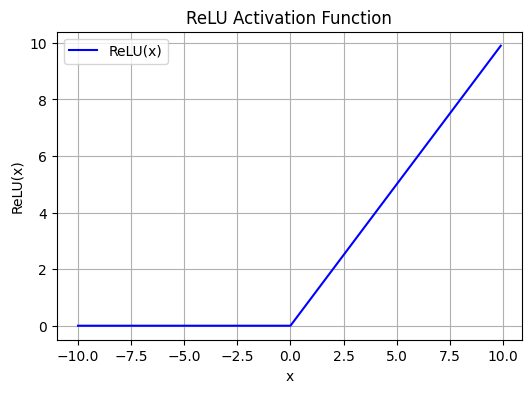

In [67]:
import torch
import torch.nn.functional as F
import matplotlib.pyplot as plt

# Tạo một dãy giá trị từ -10 đến 10
x = torch.arange(-10.0, 10.0, 0.1, requires_grad=True)
# Áp dụng hàm ReLU
y = F.relu(x)

# Vẽ đồ thị
plt.figure(figsize=(6, 4))
plt.plot(x.detach(), y.detach(), label="ReLU(x)", color='blue')
plt.title("ReLU Activation Function")
plt.xlabel("x")
plt.ylabel("ReLU(x)")
plt.grid(True)
plt.legend()
plt.show()


Khi đầu vào là một số âm, đạo hàm của hàm ReLU bằng 0, và khi đầu vào là một số dương, đạo hàm của hàm ReLU bằng 1. Lưu ý rằng hàm ReLU không khả vi tại điểm mà đầu vào bằng đúng 0. Trong những trường hợp như vậy, chúng ta mặc định lấy đạo hàm bên trái, và coi đạo hàm tại điểm 0 là 0. Chúng ta có thể làm điều này bởi vì giá trị đầu vào thường sẽ không bao giờ chính xác bằng 0 (các nhà toán học nói rằng hàm này không khả vi trên một tập hợp có độ đo bằng 0). Sau đây, ta sẽ quan sát trực quan đồ thị của đạo hàm ReLU.

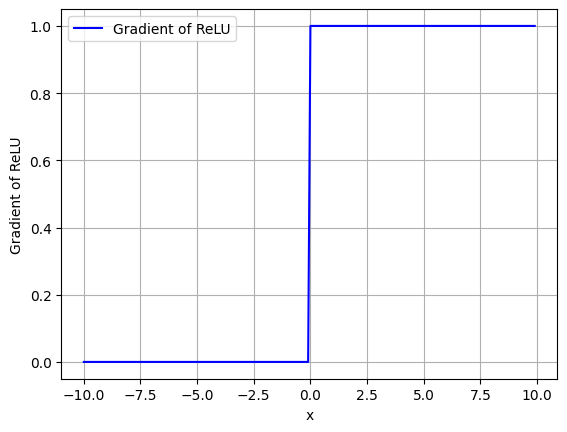

In [68]:
y.backward(torch.ones_like(x), retain_graph=True)
plt.plot(x.detach(), x.grad, label="Gradient of ReLU", color='blue')
plt.xlabel("x")
plt.ylabel("Gradient of ReLU")
plt.grid(True)
plt.legend()
plt.show()

#### Điểm yếu của hàm ReLU
Khi sử dụng ReLU, có một vấn đề mà bạn cần lưu ý: nếu đầu vào của ReLU luôn âm, hàm ReLU sẽ trả về giá trị $0$, và do đó gradient của nó cũng sẽ là 0. Điều này dẫn đến một hiện tượng được gọi là dead neurons hoặc "neurons chết": các neuron sẽ không có khả năng học nữa vì chúng không nhận được thông tin gradient trong quá trình lan truyền ngược (backpropagation).

Có nhiều biến thể của hàm ReLU, một trong số đó là hàm parametrized ReLU (pReLU). Hàm này thêm một hằng số tuyến tính vào ReLU, vì vậy một số thông tin vẫn có thể đi qua, ngay cả khi đối số là âm. 

$$\operatorname{pReLU}(x) = \max(0, x) + \alpha \min(0, x).$$

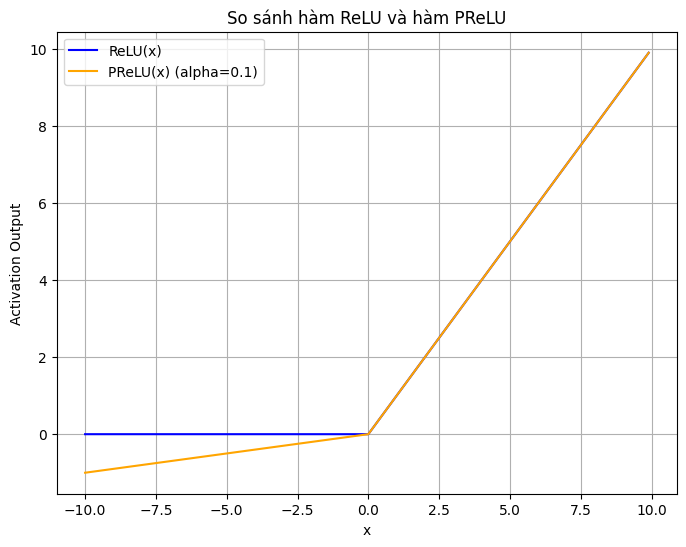

In [69]:
# Tạo một dãy giá trị từ -10 đến 10
alpha = 0.1  # Tham số alpha cho PReLU
y_prelu = torch.where(x >= 0, x, alpha * x)  # Công thức PReLU

# Vẽ đồ thị
plt.figure(figsize=(8, 6))
plt.plot(x.detach(), y.detach(), label="ReLU(x)", color='blue')
plt.plot(x.detach(), y_prelu.detach(), label=f"PReLU(x) (alpha={alpha})", color='orange')
plt.title("So sánh hàm ReLU và hàm PReLU")
plt.xlabel("x")
plt.ylabel("Activation Output")
plt.grid(True)
plt.legend()
plt.show()

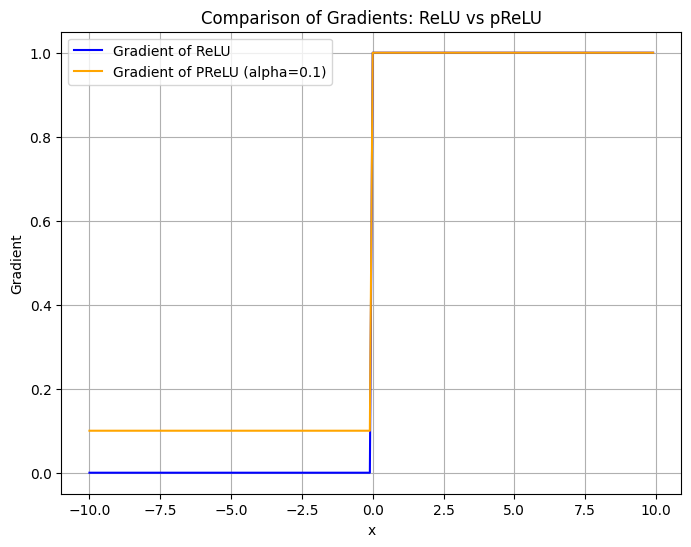

In [70]:
# Reset gradient before calculating for ReLU
x.grad = None
y.backward(torch.ones_like(x), retain_graph=True)
grad_relu = x.grad.clone()  # Save gradient of ReLU

# Reset gradient before calculating for PReLU
x.grad = None
y_prelu.backward(torch.ones_like(x), retain_graph=True)
grad_prelu = x.grad.clone()  # Save gradient of PReLU

# Plot the gradients
plt.figure(figsize=(8, 6))
plt.plot(x.detach(), grad_relu, label="Gradient of ReLU", color='blue')
plt.plot(x.detach(), grad_prelu, label=f"Gradient of PReLU (alpha={alpha})", color='orange')
plt.title("Comparison of Gradients: ReLU vs pReLU")
plt.xlabel("x")
plt.ylabel("Gradient")
plt.grid(True)
plt.legend()
plt.show()

### 4.5. Sigmoid Function
Hàm sigmoid (hay logistic function) là một hàm số liên tục, khả vi, cho đầu ra nằm trong khoảng (0, 1). Công thức thường gặp là:
 $$\sigma(x) = \frac{1}{1 + e^{-x}}$$
Đặc điểm:
  - Đầu ra của hàm nằm trong khoảng (0,1). 
  - Đồ thị có dạng đường con hình chữ S, đầu ra tiến tới 0 khi x tiến tới -∞ và tiến tới 1 khi x tiến tới +∞, không zero-centered.
  - Dễ bị vanishing gradient khi |x| lớn.


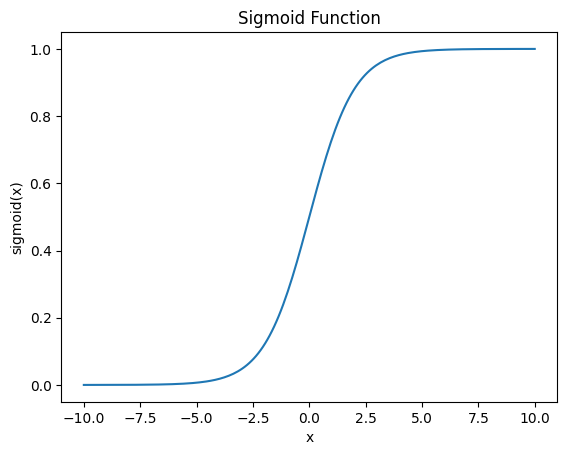

In [71]:
x = torch.linspace(-10, 10, 200)
y = d2l.sigmoid(x)
plt.figure()
plt.plot(x.numpy(), y.numpy())
plt.title('Sigmoid Function')
plt.xlabel('x')
plt.ylabel('sigmoid(x)')
plt.show()

### Đạo hàm của hàm Sigmoid
Đạo hàm của hàm sigmoid được tính theo công thức:

$$\sigma'(x) = \sigma(x) \cdot (1 - \sigma(x))$$

Trong đó:
- $\sigma(x)$ là giá trị của hàm sigmoid tại $x$.
- $\sigma'(x)$ là đạo hàm của hàm sigmoid tại $x$.
- Đồ thị của đạo hàm hàm sigmoid có dạng hình chuông, đạt giá trị lớn nhất tại $x = 0$.
- Giá trị đạo hàm tiến dần về 0 khi $x$ tiến tới $-\infty$ hoặc $+\infty$.
- Đạo hàm của hàm sigmoid nhỏ khi giá trị $|x|$ lớn, dẫn đến hiện tượng vanishing gradient trong mạng nơ-ron sâu.
Đạo hàm này được sử dụng phổ biến trong các bài toán học sâu, đặc biệt là trong quá trình lan truyền ngược (backpropagation).

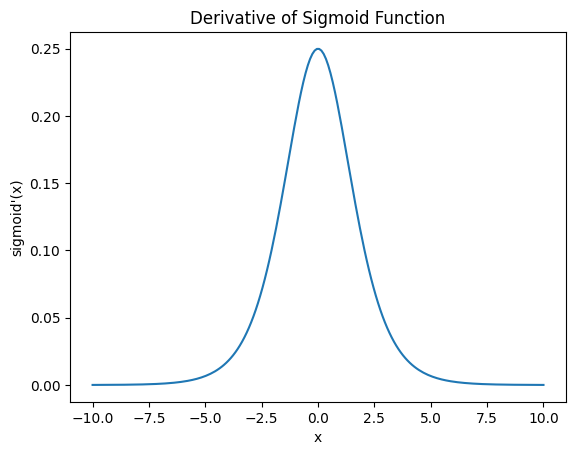

In [72]:
sigmoid_derivative = y * (1 - y)
plt.figure()
plt.plot(x.numpy(), sigmoid_derivative.numpy())
plt.title('Derivative of Sigmoid Function')
plt.xlabel('x')
plt.ylabel("sigmoid'(x)")
plt.show()

### 4.6. Tanh Function

- **Định nghĩa**: $$\tanh(x) = \frac{e^x - e^{-x}}{e^x + e^{-x}}$$
- **Đặc điểm**:
  - Đầu ra của hàm nằm trong khoảng từ (-1, 1). 
  - Zero-centered, đối xứng qua gốc toạ độ. Khi x có giá trị gần bằng 0, hàm tanh sẽ tiến tới một phép biến đổi tuyến tính.
  - Vẫn có vanishing gradient nhưng ít hơn sigmoid


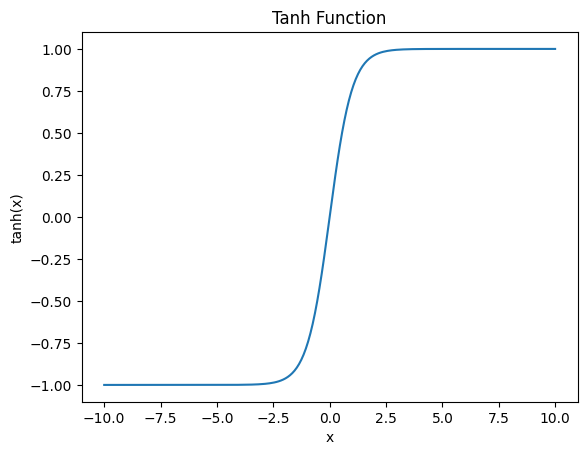

In [73]:
y = d2l.tanh(x)
plt.figure()
plt.plot(x.numpy(), y.numpy())
plt.title('Tanh Function')
plt.xlabel('x')
plt.ylabel('tanh(x)')
plt.show()


### Đạo hàm của hàm Tanh

Đạo hàm của hàm tanh được tính theo công thức:

$$\tanh'(x) = 1 - \tanh^2(x)$$

Trong đó:
- $\tanh(x)$ là giá trị của hàm tanh tại $x$.
- $\tanh'(x)$ là đạo hàm của hàm tanh tại $x$.

Đặc điểm:
- Đạo hàm của hàm tanh đạt giá trị lớn nhất tại $x = 0, khi đó output bằng 1
- Giá trị đạo hàm giảm dần khi $|x|$ tăng, dẫn đến hiện tượng vanishing gradient trong mạng nơ-ron sâu.
- Đạo hàm này thường được sử dụng trong các bài toán học sâu, đặc biệt là trong quá trình lan truyền ngược (backpropagation).

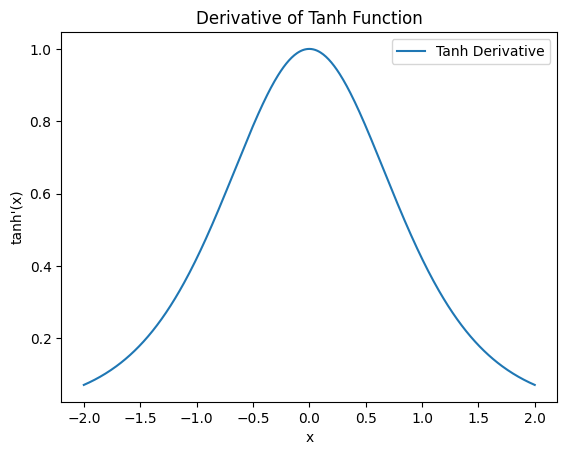

In [74]:
elements_smooth = torch.linspace(-2, 2, 500)

tanh_values_smooth = d2l.tanh(elements_smooth)
tanh_derivative_values_smooth = 1 - tanh_values_smooth**2

plt.figure()
plt.plot(elements_smooth.numpy(), tanh_derivative_values_smooth.numpy(), label="Tanh Derivative")
plt.title("Derivative of Tanh Function")
plt.xlabel("x")
plt.ylabel("tanh'(x)")
plt.legend()
plt.show()

### So sánh và ứng dụng

Chúng ta có thể so sánh hàm tanh và sigmoid bằng cách làm exercises số 5 .Hàm Sigmoid và hàm tanh rất giống nhau. Chứng minh rằng $$\operatorname{tanh}(x) + 1 = 2 \operatorname{sigmoid}(2x)$$.
#### Chứng minh:  
Định nghĩa của $\operatorname{tanh}(x)$ và $\operatorname{sigmoid}(x)$:  
        $$\operatorname{tanh}(x) = \frac{e^x - e^{-x}}{e^x + e^{-x}}, \quad \operatorname{sigmoid}(x) = \frac{1}{1 + e^{-x}}.$$  
        Thay $\operatorname{sigmoid}(2x)$ vào vế phải phương trình:  
        $$2 \cdot \operatorname{sigmoid}(2x) = \frac{2}{1 + e^{-2x}}.$$  
        Thay $\operatorname{tanh}(x)$ vào vế trái phương trình:  
        $$\operatorname{tanh}(x) + 1 = \frac{e^x - e^{-x}}{e^x + e^{-x}} + 1.$$  
        Biến đổi vế trái:  
        $$\operatorname{tanh}(x) + 1 = \frac{e^x - e^{-x} + e^x + e^{-x}}{e^x + e^{-x}} = \frac{2e^x}{e^x + e^{-x}}.$$  
        Nhận thấy rằng $\frac{2e^x}{e^x + e^{-x}}$ tương đương với $\frac{2}{1 + e^{-2x}}$.  
        Do đó,  
        $$\operatorname{tanh}(x) + 1 = 2 \cdot \operatorname{sigmoid}(2x).$$


In [75]:
from d2l import torch as d2l
# Tạo x là một tensor để thử nghiệm
x = torch.linspace(-5, 5, 100)  # 100 điểm từ -5 đến 5

# tanh(x) + 1
lhs = d2l.tanh(x) + 1

# 2 * sigmoid(2x)
rhs = 2 * d2l.sigmoid(2 * x)

# Dùng hàm torch.allclose để kiểm tra xem lhs và rhs có chênh lệch tuyệt đối nhỏ hơn ngưỡng quy định hay không.
is_equal = torch.allclose(lhs, rhs, atol=1e-6)

# Print the result
print("Tanh(x) + 1:", lhs)
print("2 * Sigmoid(2x):", rhs)
print("Hai vế có bằng nahu không?", is_equal)

Tanh(x) + 1: tensor([9.0778e-05, 1.1110e-04, 1.3602e-04, 1.6642e-04, 2.0367e-04, 2.4927e-04,
        3.0512e-04, 3.7336e-04, 4.5693e-04, 5.5921e-04, 6.8438e-04, 8.3750e-04,
        1.0250e-03, 1.2543e-03, 1.5348e-03, 1.8781e-03, 2.2981e-03, 2.8118e-03,
        3.4403e-03, 4.2088e-03, 5.1486e-03, 6.2976e-03, 7.7021e-03, 9.4182e-03,
        1.1515e-02, 1.4074e-02, 1.7198e-02, 2.1008e-02, 2.5650e-02, 3.1303e-02,
        3.8177e-02, 4.6525e-02, 5.6646e-02, 6.8890e-02, 8.3668e-02, 1.0145e-01,
        1.2277e-01, 1.4821e-01, 1.7843e-01, 2.1410e-01, 2.5590e-01, 3.0447e-01,
        3.6035e-01, 4.2393e-01, 4.9533e-01, 5.7437e-01, 6.6049e-01, 7.5271e-01,
        8.4963e-01, 9.4954e-01, 1.0505e+00, 1.1504e+00, 1.2473e+00, 1.3395e+00,
        1.4256e+00, 1.5047e+00, 1.5761e+00, 1.6396e+00, 1.6955e+00, 1.7441e+00,
        1.7859e+00, 1.8216e+00, 1.8518e+00, 1.8772e+00, 1.8986e+00, 1.9163e+00,
        1.9311e+00, 1.9434e+00, 1.9535e+00, 1.9618e+00, 1.9687e+00, 1.9743e+00,
        1.9790e+00, 1.9828e

### 4.7. Summary
- Chúng ta đều đã thấy được vai trò của hàm phi tuyến trong mạng MLP dùng để kích hoạt và tăng khả năng biểu diễn mô hình so với mạng chỉ sử dụng thuần các hàm tuyến tính.
- Thấy được đặc điểm của ba loại hàm phi tuyến ReLu, Sigmoid và Tanh.


<div align="center">

| Đặc điểm                   | **ReLU**                         | **Sigmoid**                        | **Tanh**                                       |
|:---------------------------|:--------------------------------:|:----------------------------------:|:----------------------------------------------:|
| Định nghĩa                 | $\max(0, x)$                     | $\sigma(x) = \frac{1}{1 + e^{-x}}$ | $\tanh(x) = \frac{e^x - e^{-x}}{e^x + e^{-x}}$ |
| Phạm vi giá trị            | $[0, \infty)$                    | $(0, 1)$                           | $(-1, 1)$                                      |
| Phi tuyến                  | Có                               | Có                                 | Có                                             |
| Đạo hàm                    | $1$ nếu $x > 0$; $0$ nếu $x < 0$ | $\sigma(x)\,(1 - \sigma(x))$       | $1 - \tanh^2(x)$                               |
| Tính đơn giản              | Rất đơn giản                     | Phức tạp hơn do mũ                 | Tương đối phức tạp                             |
| Hiện tượng gradient vanish | Không (khi $x > 0$)              | Có                                 | Có                                             |
| Tính thưa (sparsity)       | Có (nhiều output bằng 0)         | Không                              | Không                                          |
| Tính tuyến tính theo đoạn  | Có                               | Không                              | Không                                          |

</div>


- **Chọn hàm**:
  - Sigmoid: thích hợp cho đầu ra phân loại nhị phân (xác suất).
  - Tanh: đầu ra zero-centered, thường dùng ở các lớp hidden kiểu mạng nhỏ.
- Trong các mạng sâu hiện đại, thường ưu tiên ReLU và biến thể để giảm thiểu vanishing gradient.

## 5. Exercises
### 1. Show that adding layers to a linear deep network cannot increase expressive power. Give an example where it reduces it.

Chứng minh việc thêm lớp vào mạng tuyến tính không tăng năng lực biểu diễn

Trong mạng nơ-ron, mỗi lớp tuyến tính có dạng:

$$f(\mathbf{x}) = W\mathbf{x} + \mathbf{b}$$

Nếu ta xếp chồng hai lớp tuyến tính liên tiếp (không có hàm kích hoạt phi tuyến), ta có:

$$
\begin{aligned}
f_1(\mathbf{x}) &= W_1 \mathbf{x} + \mathbf{b}_1,\\
f_2(\mathbf{z}) &= W_2 \mathbf{z} + \mathbf{b}_2,
\end{aligned}
$$

với $\mathbf{z} = f_1(\mathbf{x})$. Khi đó:

 $$
 f_2(f_1(\mathbf{x}))
 = W_2 (W_1 \mathbf{x} + \mathbf{b}_1) + \mathbf{b}_2
 = (W_2 W_1)\,\mathbf{x} \;+\; (W_2\mathbf{b}_1 + \mathbf{b}_2).
$$

Như vậy, ta có thể thấy khi có hai lớp tuyến tính liên tiếp ta có thể biểu diễn tương đương chỉ bằng một lớp tuyến tính với
ma trận trọng số $W = W_2 W_1$ và vector bias $\mathbf{b} = W_2\mathbf{b}_1 + \mathbf{b}_2$.

 **Kết luận:** Mạng sâu chỉ gồm các lớp tuyến tính (không có hàm kích hoạt phi tuyến) hoàn toàn tương đương với một tầng tuyến tính duy nhất, nên độ sâu không tăng năng lực biểu diễn.

Một ví dụ đơn giản chứng minh cho kết luận trên:

Xét mạng sâu gồm hai lớp tuyến tính:

$$
 \begin{aligned}
 z &= w_1 x + b_1,\\
 y_{\mathrm{deep}} &= w_2\,z + b_2.
 \end{aligned}
 $$

 Chúng ta chọn các tham số:
 $$
 w_1 = 2,\quad b_1 = 1,\quad
 w_2 = 3,\quad b_2 = 4,\quad
 x = 5.
 $$

Thay số vào công thức:
 
 $$
 z = w_1 x + b_1 = 2 \times 5 + 1 = 11.
 $$
 
 $$
 y_{\mathrm{deep}} = w_2\,z + b_2 = 3 \times 11 + 4 = 33 + 4 = 37.
 $$

 Giờ chúng ta ghép hai lớp thành một lớp duy nhất:
 $$
 \begin{aligned}
 w_{\mathrm{eff}} &= w_2\,w_1 = 3 \times 2 = 6,\\
 b_{\mathrm{eff}} &= w_2\,b_1 + b_2 = 3 \times 1 + 4 = 7.
 \end{aligned}
 $$

 Khi đó:
 $$
 y_{\mathrm{shallow}} = w_{\mathrm{eff}}\,x + b_{\mathrm{eff}}
 = 6 \times 5 + 7 = 30 + 7 = 37.
 $$

 Ta thấy 
 $$
 y_{\mathrm{deep}} = y_{\mathrm{shallow}} = 37,
 $$
chứng tỏ hai lớp tuyến tính hoàn toàn tương đương với một lớp tuyến tính hợp nhất.

In [76]:
import numpy as np

w1, b1 = 2, 1
w2, b2 = 3, 4
x = 5

# Mạng sâu: hai lớp tuyến tính
z = w1 * x + b1
y_deep = w2 * z + b2

# Mạng nông: một lớp hiệu dụng
w_eff = w2 * w1
b_eff = w2 * b1 + b2
y_shallow = w_eff * x + b_eff

print("y_deep    =", y_deep)      # 37
print("y_shallow =", y_shallow)   # 37


y_deep    = 37
y_shallow = 37


Tiếp theo ta sẽ chứng minh khi thêm nhiều lớp tuyến tính vào thì khả năng biểu diễn của mạng có thể suy giảm.

Ví dụ giảm năng lực biểu diễn khi có bottleneck

Xét mạng tuyến tính sâu với kích thước:
- Input dimension: 3
- Hidden dimension: 2
- Output dimension: 3

Ma trận trọng số:
 $$W_1\in\mathbb{R}^{2\times 3},\quad W_2\in\mathbb{R}^{3\times 2}.$$

 Ma trận hiệu dụng $W_{\rm eff} = W_2\,W_1$ có kích thước $3\times 3$, nhưng
 $$\mathrm{rank}(W_{\rm eff})\le \min(\mathrm{rank}(W_2),\,\mathrm{rank}(W_1))
 \le 2.$$

 Trong khi đó, một lớp tuyến tính 3×3 duy nhất có thể đạt rank lên đến 3. Như vậy,
 mạng sâu với bottleneck 2 chiều chỉ có thể biểu diễn các ánh xạ tuyến tính có
 rank tối đa bằng 2, kém hơn mạng nông 3×3 (có thể đạt rank 3).

 Như vậy, việc thêm lớp tuyến tính với bottleneck (ẩn nhỏ hơn cả đầu vào và đầu ra) có thể dẫn đến sự suy giảm khả năng biểu diễn của mô hình.

 Bên dưới là ví dụ minh hoạ bằng python.


In [77]:
# Khởi tạo W1 (2x3) và W2 (3x2) và W0_normal (3x3)
W0_normal = np.random.randn(3, 3)
W1_bottle = np.random.randn(2, 3)
W2_bottle = np.random.randn(3, 2)

# Tính ma trận hiệu dụng và rank
W_eff_bottle = W2_bottle @ W1_bottle
rank_eff = np.linalg.matrix_rank(W_eff_bottle)
rank_normal = np.linalg.matrix_rank(W0_normal)

print("Kích thước ma trận hiệu dụng bị bottle neck:", W_eff_bottle.shape)
print("Rank của ma trận hiệu dụng bị bottle neck:", rank_eff, "(≤ 2)")

print("Kích thước ma trận normal không bị bottle neck:", W0_normal.shape)
print("Rank của ma trận normal không bị bottle neck:", rank_normal, "(≤ 3)")


Kích thước ma trận hiệu dụng bị bottle neck: (3, 3)
Rank của ma trận hiệu dụng bị bottle neck: 2 (≤ 2)
Kích thước ma trận normal không bị bottle neck: (3, 3)
Rank của ma trận normal không bị bottle neck: 3 (≤ 3)


### 2. Compute the derivative of the pReLU activation function.

Hàm kích hoạt pReLU (Parametric Rectified Linear Unit) được định nghĩa như sau:

$$
\operatorname{pReLU}(x) = 
\begin{cases} 
x & \text{if } x \geq 0, \\
\alpha x & \text{if } x < 0,
\end{cases}
$$

với $\alpha$ có thể học được.

Đạo hàm của hàm pReLU được chia thành 2 phần, tùy thuộc vào giá trị của $x$:

$$
\frac{d}{dx} \operatorname{pReLU}(x) = 
\begin{cases} 
1 & \text{if } x \geq 0, \\
\alpha & \text{if } x < 0.
\end{cases}
$$
1. Với $x \geq 0$, hàm này là một hàm số học với độ dốc bằng 1, vì vậy đạo hàm của nó là 1.
2. Với $x < 0$, hàm này là một hàm số học với độ dốc bằng $\alpha$, vì vậy đạo hàm của nó là $\alpha$.



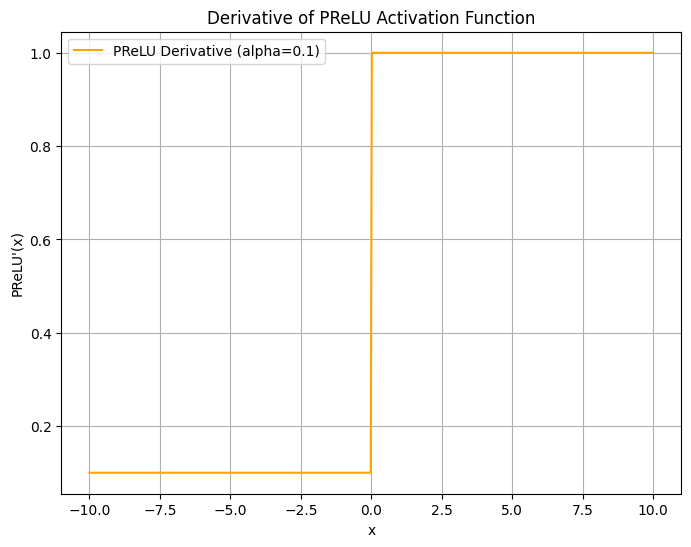

In [83]:
import torch

import matplotlib.pyplot as plt

# Define the PReLU derivative function
def prelu_derivative(x, alpha):
    return torch.where(x >= 0, torch.ones_like(x), alpha * torch.ones_like(x))

# Create a range of x values
x = torch.linspace(-10, 10, 500)
alpha = 0.1  # Parameter for PReLU

# Compute the derivative of PReLU
y_derivative = prelu_derivative(x, alpha)

# Plot the derivative of PReLU
plt.figure(figsize=(8, 6))
plt.plot(x.numpy(), y_derivative.numpy(), label=f"PReLU Derivative (alpha={alpha})", color='orange')
plt.title("Derivative of PReLU Activation Function")
plt.xlabel("x")
plt.ylabel("PReLU'(x)")
plt.grid(True)
plt.legend()
plt.show()

### 3. Compute the derivative of the Swish activation function 

Đạo hàm của hàm Swish

**Định nghĩa**  
Hàm Swish được định nghĩa là  
$$
f(x) = x \,\sigma(\beta x),
$$  
trong đó  $\sigma(x) = \frac{1}{1 + e^{-x}}$ là hàm Sigmoid, và $\quad \beta \in \mathbb{R}$ là tham số điều chỉnh độ dốc của hàm sigmoid.

**Đặc tính**:  
  - Hàm Swish có đầu ra mượt mà và liên tục, giúp giảm hiện tượng vanishing gradient so với hàm sigmoid.  
  - Khi $\beta = 1$, Swish trở thành một hàm phi tuyến phổ biến với khả năng biểu diễn tốt hơn trong các mạng nơ-ron sâu.  
  - Khi $\beta \to 0$, Swish tiến gần đến hàm tuyến tính $f(x) = x$.  
  - Khi $\beta \to \infty$, Swish tiến gần đến hàm ReLU.  
  - Swish thường được sử dụng trong các mô hình học sâu hiện đại nhờ tính năng học linh hoạt và hiệu quả.  
  
**Tính đạo hàm**  
Để tính đạo hàm của hàm Swish, ta sẽ sử dụng quy tắc sản phẩm và đạo hàm của hàm sigmoid. 
$$
f'(x) \;=\; \frac{d}{dx}[\,x\,]\;\sigma(\beta x)\;+\;x\;\frac{d}{dx}\bigl[\sigma(\beta x)\bigr].
$$  
- Vì $\frac{d}{dx}x = 1.$,  
- Và với $\sigma(u)$, ta có  
  $$
  \sigma'(u) = \sigma(u)\,\bigl(1 - \sigma(u)\bigr).
  $$  
  Suy ra  
  $$
  \frac{d}{dx}\bigl[\sigma(\beta x)\bigr]
  = \sigma'(\beta x)\,\frac{d}{dx}[\beta x]
  = \beta\,\sigma(\beta x)\,\bigl(1 - \sigma(\beta x)\bigr).
  $$  

Thay vào, ta được  
$$
f'(x)
= \sigma(\beta x)
+ x \,\beta\,\sigma(\beta x)\,\bigl(1 - \sigma(\beta x)\bigr).
$$

**Kết luận**  
Đạo hàm của hàm Swish có thể viết gọn là  
$$
\boxed{\,f'(x) = \sigma(\beta x)
+ \beta\,x\,\sigma(\beta x)\bigl(1 - \sigma(\beta x)\bigr)\,}.
$$

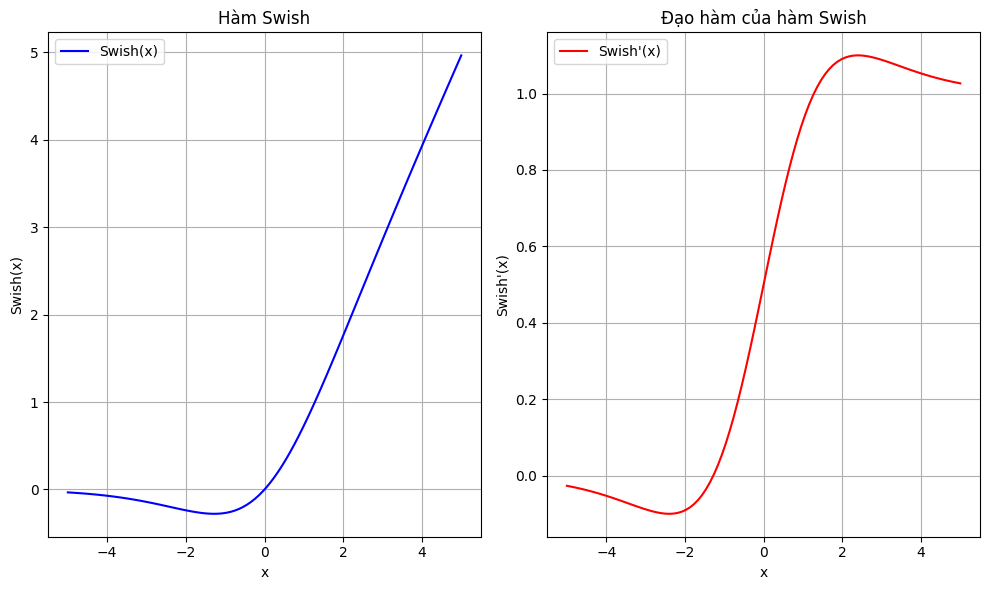

In [84]:
import numpy as np
import matplotlib.pyplot as plt

# Hàm sigmoid
def sigmoid(x):
    return 1 / (1 + np.exp(-x))

# Hàm Swish và đạo hàm của Swish
def swish(x, beta):
    return x * sigmoid(beta * x)

def swish_derivative(x, beta):
    sig = sigmoid(beta * x)
    return sig + x * beta * sig * (1 - sig)

# Tạo các giá trị x từ -5 đến 5
x = np.linspace(-5, 5, 100)
beta = 1  # Tham số beta

# Tính giá trị của Swish và đạo hàm của Swish
y = swish(x, beta)
y_prime = swish_derivative(x, beta)

# Vẽ đồ thị của Swish và đạo hàm của nó
plt.figure(figsize=(10, 6))

# Đồ thị của hàm Swish
plt.subplot(1, 2, 1)
plt.plot(x, y, label="Swish(x)", color='blue')
plt.title("Hàm Swish")
plt.xlabel("x")
plt.ylabel("Swish(x)")
plt.grid(True)
plt.legend()

# Đồ thị của đạo hàm hàm Swish
plt.subplot(1, 2, 2)
plt.plot(x, y_prime, label="Swish'(x)", color='red')
plt.title("Đạo hàm của hàm Swish")
plt.xlabel("x")
plt.ylabel("Swish'(x)")
plt.grid(True)
plt.legend()

plt.tight_layout()
plt.show()


### 4. Show that an MLP using only ReLU (or pReLU) constructs a continuous piecewise linear function.

##### Định nghĩa MLP
Một MLP bao gồm các tầng (layers) với các phép biến đổi tuyến tính (linear transformations) và hàm kích hoạt phi tuyến (activation function). Công thức tổng quát của một MLP với một tầng ẩn là:

$$
\mathbf{H} = \sigma(\mathbf{X} \mathbf{W}^{(1)} + \mathbf{b}^{(1)}), \\
\mathbf{O} = \mathbf{H} \mathbf{W}^{(2)} + \mathbf{b}^{(2)},
$$

trong đó:
- $\mathbf{X}$: đầu vào (input),
- $\mathbf{W}^{(1)}, \mathbf{W}^{(2)}$: ma trận trọng số (weight matrices),
- $\mathbf{b}^{(1)}, \mathbf{b}^{(2)}$: vector bias,
- $\sigma$: hàm kích hoạt (ReLU hoặc pReLU).

##### Tính chất của hàm ReLU và pReLU
Hàm ReLU được định nghĩa là:
$$
\operatorname{ReLU}(x) = \max(0, x).
$$

Hàm pReLU được định nghĩa là:
$$
\operatorname{pReLU}(x) = 
\begin{cases} 
x & \text{nếu } x \geq 0, \\
\alpha x & \text{nếu } x < 0,
\end{cases}
$$
với $\alpha$ là một tham số có thể học được.

Cả hai hàm này đều là **hàm liên tục, phân mảnh tuyến tính**:
- Hàm ReLU có hai đoạn tuyến tính: $y = 0$ khi $x < 0$ và $y = x$ khi $x \geq 0$.
- Hàm pReLU cũng có hai đoạn tuyến tính: $y = \alpha x$ khi $x < 0$ và $y = x$ khi $x \geq 0$.

##### Tính chất của MLP sử dụng ReLU/pReLU
Khi áp dụng ReLU hoặc pReLU vào MLP:
1. **Phép biến đổi tuyến tính**: Mỗi tầng của MLP thực hiện phép biến đổi tuyến tính $\mathbf{X} \mathbf{W} + \mathbf{b}$.
2. **Hàm kích hoạt phi tuyến**: Hàm ReLU hoặc pReLU được áp dụng sau phép biến đổi tuyến tính, tạo ra một hàm phân mảnh tuyến tính.

Do đó, đầu ra của mỗi tầng là một **hàm phân mảnh tuyến tính**. Khi kết hợp nhiều tầng, đầu ra cuối cùng của MLP là sự kết hợp của các hàm phân mảnh tuyến tính, vẫn giữ tính chất **liên tục và phân mảnh tuyến tính**.

##### Chứng minh tính liên tục
- Hàm ReLU và pReLU đều liên tục, do đó đầu ra của mỗi tầng là một hàm liên tục.
- Phép biến đổi tuyến tính $\mathbf{X} \mathbf{W} + \mathbf{b}$ cũng là một phép toán liên tục.
- Kết hợp các phép toán liên tục qua nhiều tầng, đầu ra cuối cùng của MLP vẫn là một hàm liên tục.

##### Chứng minh tính phân mảnh tuyến tính
- Hàm ReLU và pReLU chia không gian đầu vào thành các vùng (regions) dựa trên điều kiện $x \geq 0$ hoặc $x < 0$.
- Mỗi vùng tương ứng với một hàm tuyến tính khác nhau.
- Khi kết hợp nhiều tầng, số lượng vùng tăng lên, nhưng trong mỗi vùng, đầu ra của MLP vẫn là một hàm tuyến tính.

##### Kết luận
Một MLP sử dụng hàm kích hoạt ReLU hoặc pReLU tạo ra một **hàm liên tục, phân mảnh tuyến tính**. Điều này có nghĩa là đầu ra của MLP là một hàm tuyến tính trong từng vùng nhỏ của không gian đầu vào, và các vùng này được xác định bởi các điều kiện của hàm kích hoạt.

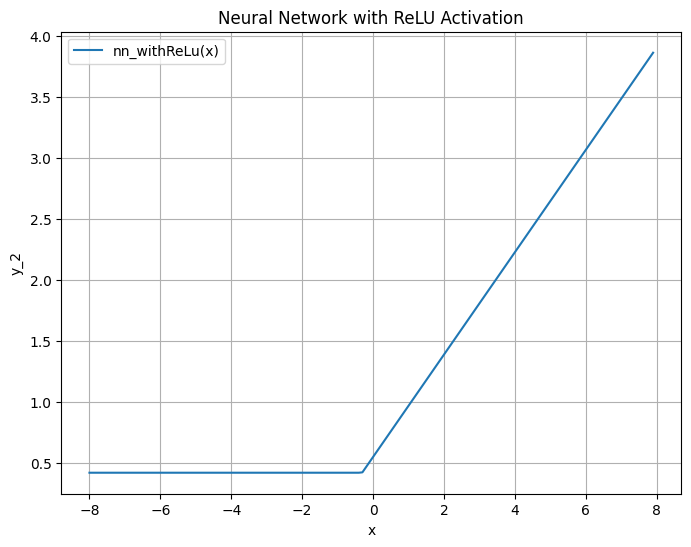

In [85]:
import torch
import matplotlib.pyplot as plt

x_1 = torch.arange(-8.0, 8.0, 0.1)
w_1 = torch.rand(1, 1)
b_1 = torch.rand(1, 1)
y_1 = x_1 * w_1 + b_1
x_2 = torch.relu(y_1)
w_2 = torch.rand(1, 1)
b_2 = torch.rand(1, 1)
y_2 = x_2 * w_2 + b_2

# Plot the result
plt.figure(figsize=(8, 6))
plt.plot(x_1.detach().numpy(), y_2.squeeze().detach().numpy(), label="nn_withReLu(x)")
plt.xlabel("x")
plt.ylabel("y_2")
plt.title("Neural Network with ReLU Activation")
plt.legend()
plt.grid(True)
plt.show()

### 5. Sigmoid and tanh are very similar.
1. Show that $\operatorname{tanh}(x) + 1 = 2 \operatorname{sigmoid}(2x)$.
2. Prove that the function classes parametrized by both nonlinearities are identical. Hint: affine layers have bias terms, too.

**Biến đổi tuyến tính và các hạng tử dịch (bias):**:
    - Cả hai hàm sigmoid và tanh đều được áp dụng sau một biến đổi tuyến tính của đầu vào, tức là $ z = Wx + b $, trong đó $ W $ là ma trận trọng số, $ x $ là đầu vào, và $b$ là vector bias.
    - Hàm sigmoid được định nghĩa là:
      $
      \operatorname{sigmoid}(z) = \frac{1}{1 + e^{-z}}
      $
    - Hàm tanh được định nghĩa là:
      $
      \tanh(z) = \frac{e^z - e^{-z}}{e^z + e^{-z}}
      $

**Mối quan hệ giữa Sigmoid và Tanh**:
    - Hàm tanh có thể được biểu diễn theo hàm sigmoid:
      $
      \tanh(z) = 2\operatorname{sigmoid}(2z) - 1
      $
    - Tương tự, hàm sigmoid có thể được biểu diễn theo hàm tanh:
      $
      \operatorname{sigmoid}(z) = \frac{\tanh(z/2) + 1}{2}
      $

**Lớp hàm (Function Classes)**:
    - Một mạng nơ-ron với hàm kích hoạt sigmoid sẽ áp dụng sigmoid lên biểu thức tuyến tínhn $z = Wx + b$.
    - Một mạng nơ-ron với hàm kích hoạt tanh sẽ áp dụng tanh lên biểu thức tuyến tính $ z = Wx + b$.

**Tính tương đương của các lớp hàm**:
    - Với bất kỳ mạng nơ-ron nào sử dụng hàm sigmoid, ta có thể thay thế hàm sigmoid bằng hàm tanh bằng cách điều chỉnh tỉ lệ trong biến đổi tuyến tính. Cụ thể:
      - Thay thế $z$ bằng $2z$ trong biểu thức tuyến tính.
      - Sử dụng mối quan hệ $\tanh(z) = 2\operatorname{sigmoid}(2z) - 1$ để tính đầu ra tương đương với tanh.
    - Tương tự, với bất kỳ mạng nơ-ron nào sử dụng hàm tanh, ta có thể thay thế bằng hàm sigmoid bằng cách điều chỉnh tỉ lệ trong biến đổi tuyến tính. Cụ thể:
      - Thay thế $z$ bằng $z/2 trong biểu thức tuyến tính.
      - Sử dụng mối quan hệ $\operatorname{sigmoid}(z) = \frac{\tanh(z/2) + 1}{2}$ để tính đầu ra tương đương với sigmoid.

**Kết luận**:
    - Vì biến đổi tuyến tính có thể được điều chỉnh để bù cho sự khác biệt về tỉ lệ giữa sigmoid và tanh, nên các lớp hàm được tham số hóa bởi cả hai loại hàm phi tuyến đều là giống nhau.

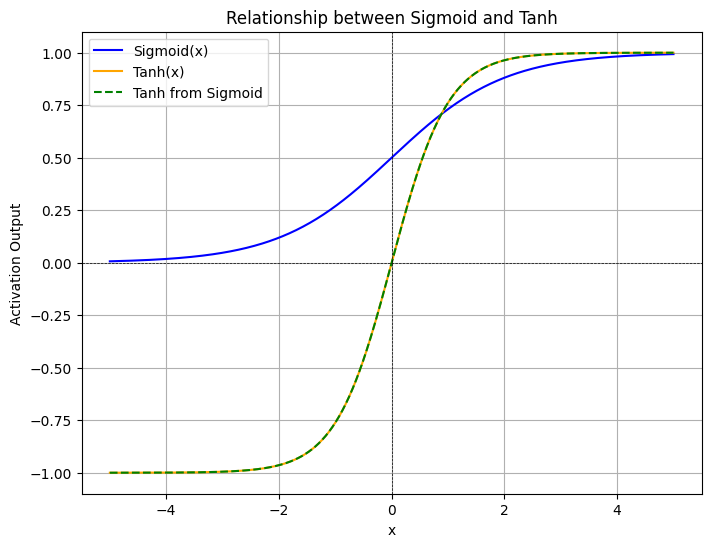

In [86]:
import numpy as np

import matplotlib.pyplot as plt

# Tạo dãy giá trị x
x = np.linspace(-5, 5, 500)

# Tính giá trị sigmoid và tanh
sigmoid = 1 / (1 + np.exp(-x))
tanh = np.tanh(x)

# Tính tanh từ sigmoid theo công thức
tanh_from_sigmoid = 2 * (1 / (1 + np.exp(-2 * x))) - 1

# Vẽ đồ thị
plt.figure(figsize=(8, 6))
plt.plot(x, sigmoid, label="Sigmoid(x)", color="blue")
plt.plot(x, tanh, label="Tanh(x)", color="orange")
plt.plot(x, tanh_from_sigmoid, "--", label="Tanh from Sigmoid", color="green")
plt.title("Relationship between Sigmoid and Tanh")
plt.xlabel("x")
plt.ylabel("Activation Output")
plt.axhline(0, color="black", linewidth=0.5, linestyle="--")
plt.axvline(0, color="black", linewidth=0.5, linestyle="--")
plt.legend()
plt.grid(True)
plt.show()


### 6. Định nghĩa Batch Normalization
Batch normalization (Ioffe & Szegedy, 2015) là kỹ thuật chuẩn hóa đầu vào của mỗi lớp trong mạng nơ-ron bằng cách sử dụng thống kê (mean và variance) tính trên mỗi minibatch. Cho một minibatch đầu vào $$\{x^{(1)}, \dots, x^{(m)}\}$$ 
1. **Tính mean (μ_B)**  
   Với minibatch kích thước \(m\), tính trung bình:
   $$
     \mu_B = \frac{1}{m}\sum_{i=1}^m x^{(i)}
   $$
2. **Tính variance (σ_B²)**  
   Tính phương sai:
   $$
     \sigma_B^2 = \frac{1}{m}\sum_{i=1}^m \bigl(x^{(i)} - \mu_B\bigr)^2
   $$
3. **Chuẩn hóa (x̂)**  
   Đưa dữ liệu về phân phối chuẩn:
   $$
     \hat{x}^{(i)} = \frac{x^{(i)} - \mu_B}{\sqrt{\sigma_B^2 + \epsilon}}
   $$
4. **Scale và shift (y)**  
   Cho phép mô hình điều chỉnh lại phân phối đầu ra:
   $$
     y^{(i)} = \gamma\,\hat{x}^{(i)} + \beta
   $$
   - $\epsilon$ là hằng số nhỏ tránh chia cho 0.  
   - $\gamma, \beta$ là tham số học được.


Những vấn đề có thể xảy ra

Dựa trên cách tính trên, hai vấn đề quan trọng nhất khi áp dụng trên từng minibatch là:

1. **Batch size quá nhỏ (ví dụ $m=1$)**  
   - Khi $$m=1$$, ta có $$\sigma_B^2 = 0$$, dẫn đến $$\hat{x}^{(1)} = 0$$ sau chuẩn hóa, toàn bộ thông tin biến mất.

2. **Phụ thuộc vào thành phần của minibatch**  
   - Các mẫu trong cùng batch ảnh hưởng lẫn nhau: cùng một mẫu đưa vào hai batch khác nhau sẽ cho đầu ra khác nhau, gây **nhiễu ngẫu nhiên** và khó tái lập kết quả.


Ví dụ minh hoạ bằng Python




In [ ]:
# %%
import numpy as np

def batch_norm(X, eps=1e-5):
    mu = X.mean(axis=0)
    var = X.var(axis=0)
    return (X - mu) / np.sqrt(var + eps)

# Ví dụ 1: m = 1
X_single = np.array([[10.0, -5.0,  3.0]])   # batch size = 1
print("Input (m=1):\n", X_single)
print("Output BN (m=1):\n", batch_norm(X_single))

# Ví dụ 2: Cùng một mẫu nhưng 2 batch khác nhau
x = np.array([1.0, 2.0, 3.0])
B1 = np.stack([x, [10.0, 20.0, 30.0]], axis=0)
B2 = np.stack([x, [ 0.0, -1.0, -2.0]], axis=0)

print("\nBatch 1 Input:\n", B1)
print("Batch 1 BN Output:\n", batch_norm(B1))

print("\nBatch 2 Input:\n", B2)
print("Batch 2 BN Output:\n", batch_norm(B2))

Input (m=1):
 [[10. -5.  3.]]
Output BN (m=1):
 [[0. 0. 0.]]

Batch 1 Input:
 [[ 1.  2.  3.]
 [10. 20. 30.]]
Batch 1 BN Output:
 [[-0.99999975 -0.99999994 -0.99999997]
 [ 0.99999975  0.99999994  0.99999997]]

Batch 2 Input:
 [[ 1.  2.  3.]
 [ 0. -1. -2.]]
Batch 2 BN Output:
 [[ 0.99998     0.99999778  0.9999992 ]
 [-0.99998    -0.99999778 -0.9999992 ]]



- **Ví dụ 1 (m=1)**:  
  Tất cả giá trị sau chuẩn hóa bằng 0 vì variance bằng 0 ⇒ không còn thông tin ban đầu.  
- **Ví dụ 2 (batch dependency)**:  
  Cùng mẫu \([1,2,3]\) nhưng do đối tượng thứ hai khác nhau, kết quả chuẩn hóa của mẫu này cũng đổi theo, cho thấy BN không ổn định với cỡ batch nhỏ và phụ thuộc vào thành phần batch.

### 7.Provide an example where the gradients vanish for the sigmoid activation function.

1. Định nghĩa hàm sigmoid và đạo hàm

- Hàm sigmoid:
$$
\sigma(x) = \frac{1}{1 + e^{-x}}
$$

- Đạo hàm:
$$
\sigma'(x) = \sigma(x)(1 - \sigma(x))
$$

2. Khi nào đạo hàm gần bằng 0?

- Khi $$x \to -\infty \Rightarrow \sigma(x) \to 0 \Rightarrow \sigma'(x) \to 0$$
- Khi $$x \to +\infty \Rightarrow \sigma(x) \to 1 \Rightarrow \sigma'(x) \to 0$$

⟹ Với các giá trị đầu vào quá lớn hoặc quá nhỏ, đạo hàm gần bằng 0 → **gradient biến mất** trong huấn luyện mạng nơ-ron.

3. Ví dụ

Xét $$x = -10$$

$$
\sigma(-10) \approx \frac{1}{1 + e^{10}} \approx 4.54 \times 10^{-5}
$$

$$
\sigma'(-10) \approx 4.54 \times 10^{-5} \cdot (1 - 4.54 \times 10^{-5}) \approx 4.54 \times 10^{-5}
$$

→ Giá trị đạo hàm rất nhỏ gần bằng 0.

4. Kiểm tra bằng Python

In [ ]:
import numpy as np

def sigmoid(x):
    return 1 / (1 + np.exp(-x))

def sigmoid_derivative(x):
    s = sigmoid(x)
    return s * (1 - s)

x_vals = np.array([-10, -5, 0, 5, 10])
derivatives = sigmoid_derivative(x_vals)

for x, d in zip(x_vals, derivatives):
    print(f"x = {x:>4}, sigmoid'(x) = {d:.8f}")

x =  -10, sigmoid'(x) = 0.00004540
x =   -5, sigmoid'(x) = 0.00664806
x =    0, sigmoid'(x) = 0.25000000
x =    5, sigmoid'(x) = 0.00664806
x =   10, sigmoid'(x) = 0.00004540


Kết luận: khi đạo hàm của sigmoid tiến về 0, trong mạng nơ-ron sâu, việc nhân các gradient nhỏ này qua nhiều lớp sẽ dẫn đến gradient vanish →  mô hình không học được hiệu quả trong quá trình backpropagation. Đây là lý do vì sao sigmoid ít được dùng trong các lớp ẩn hiện đại.